In [1]:
import numpy as np
import pandas as pd
import SyncAcData as pySync
import processAc_tomo_funcs as pyTomo

import h5py as h5

import matplotlib.pyplot as plt
import matplotlib as mpl

Loading BokehJS ...

Loading BokehJS ...

In [19]:
exp_name = 'p5741'
run_num = 2

AcSettingsfile = "../acData/"+exp_name+'_run'+str(run_num)+'.mat'
run_path = '../acData/run'+str(run_num)+'/'

#//////////////////////////////////////////////////////
# READING IN DATA MAY DEPEND ON ANALYSIS METHOD, ETC
#------------------------------------------------------

mechData = pyTomo.read_hdf("../"+exp_name+"_r.hdf5")

#//////////////////////////////////////////////////////

"""RUN 1"""
# idxft = 70064
# idxlt = 901342 
# idxref1 = 344701
# idxref2 = 709652

"""RUN 2"""
idxft = 918429
idxlt = 1812376
idxref1 = 1188456
idxref2 = 1531289

SAVE = 1

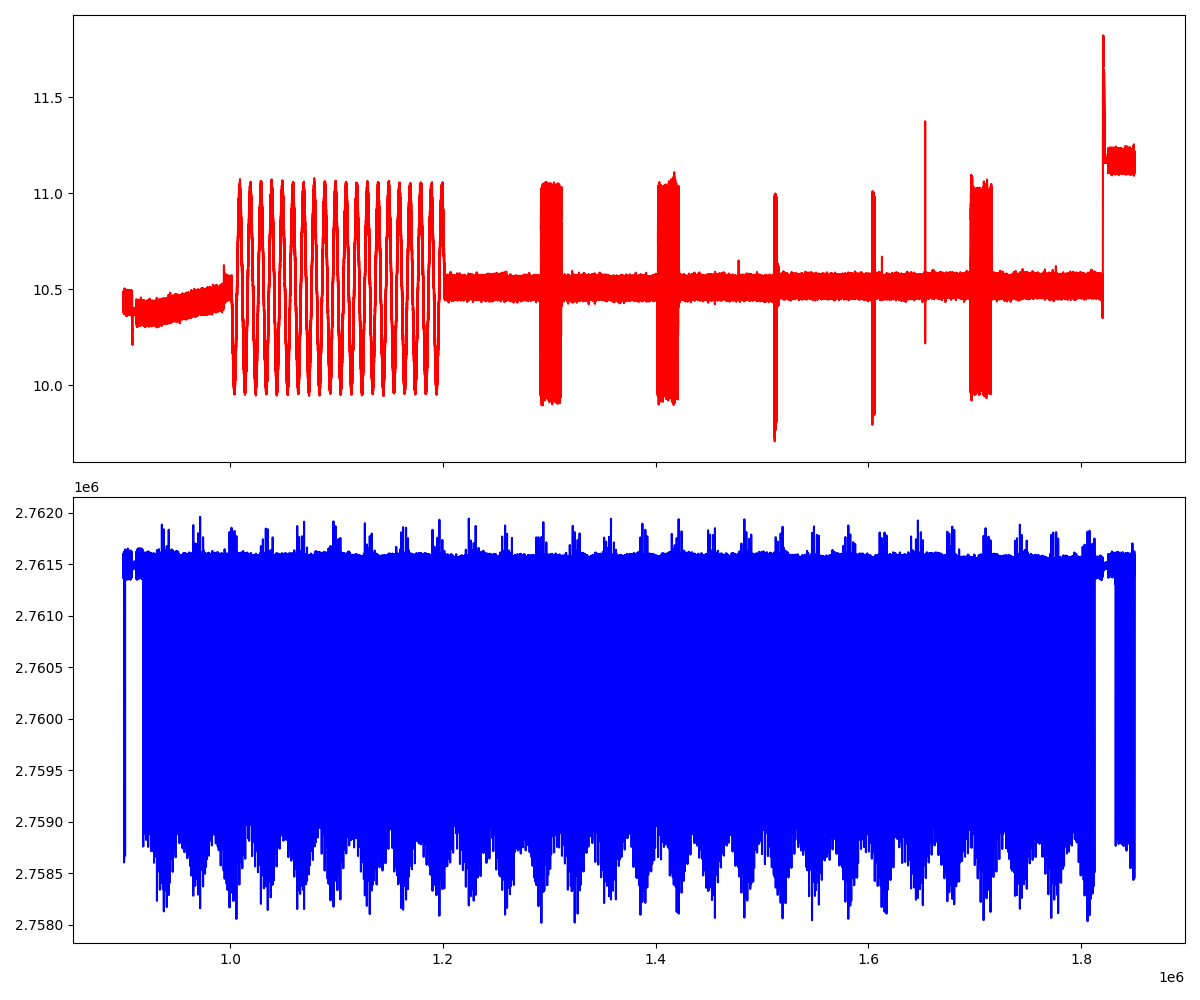

In [20]:
%matplotlib widget
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
axs[0].plot(mechData["effNS"][900000:1850000], color='red')
axs[1].plot(mechData["Sync"][900000:1850000], color='blue')
plt.tight_layout()
plt.show()

In [17]:
# acTime, acPeriod_adjusted, ts_adjusted, TotalNumberOfFiles = pySync.SyncAcData(AcSettingsfile,mechData["time_s"].to_numpy(),mechData["sync"].to_numpy(),idxft,idxlt,idxref1,idxref2,run_path)
syncData = pySync.SyncAcData(AcSettingsfile,mechData["time"].to_numpy(),mechData["Sync"].to_numpy(),idxft,idxlt,idxref1,idxref2,run_path,showplot=False)

In theory, acoustic pulses are sent every 0.3 ms.
Using biax recorder as a reference, we find 0.29999807493791 ms.
Mismatch for the acoustic pulsing rate is -1.9250620902404894 ns.


Said differently, sampling frequency is 25.0 MHz in theory.
Using biax recorder as a reference, it is adjusted to 25.000160422870266 MHz.
Mismatch for sampling time is -0.2566749453653986 ps.


First trigger added


I count 970 acoustic files for this run.
According to the trigger indices, there are 971 acoustic files.


Check that the time between consecutive triggers is constant, then zoom on the other figure to check that the sync is correct.


Calculated number of files does not match number of .ac files in ../acData/run2/
Make sure beggining and end sync triggers are correct


In [21]:
if SAVE == 1:
    with h5.File(exp_name+"_sync_run"+str(run_num)+".hdf5", "w") as f:
        for chanName in syncData.keys():
            f.create_dataset(chanName, data=syncData[chanName])
    print('Sync data for this run were saved.')
else:
    print('Sync data for this run were *not* saved.')

Sync data for this run were saved.
